In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
main_datasets_path = '/content/drive/MyDrive/LSMADEVOIR/homework2/'

In [4]:
import os
import librosa
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models



In [11]:
# Chemin vers les dossiers contenant les fichiers audio par genre
genres = ['edm', 'hip-hop', 'jazz', 'rock']
data_path = '/content/drive/MyDrive/LSMADEVOIR/homework2/audio/'


# Fonction pour extraire les caractéristiques audio
def extract_features(file_path):
    audio_data, _ = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio_data, sr=44100, n_mfcc=20)
    tempo = librosa.beat.tempo(y=audio_data, sr=44100)[0]
    mean_tempo = np.mean(tempo)
    return np.concatenate((np.mean(mfccs, axis=1), [mean_tempo]))


# Construction du jeu de données
X = []
y = []
for i, genre in enumerate(genres):
    genre_path = os.path.join(data_path, genre)
    for filename in os.listdir(genre_path):
        if filename.endswith('.mp3'):
            file_path = os.path.join(genre_path, filename)
            features = extract_features(file_path)
            X.append(features)
            y.append(i)  # Index du genre

# Conversion en tableaux numpy
X = np.array(X)
y = np.array(y)

<ipython-input-11-7e710caadba4>:10: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=audio_data, sr=44100)[0]



### **Music Dataset Note**

## Dataset Description

The dataset contains 260 tracks from four different genres collected from Spotify: EDM, Hip Hop, Jazz, and Rock. Each track is stored as an individual .mp3 file.

## Feature Extraction

The provided code extracts audio features directly from the .mp3 files and combines them into a large feature vector. These features could include Mel-Frequency Cepstral Coefficients (MFCCs), Spectrograms, Tempo, Harmonic Features, and other relevant audio characteristics.

## Tasks to Perform

# 1. Exploratory Data Analysis (EDA)
Conduct exploratory data analysis to gain insights into the distribution, characteristics, and relationships within the dataset.
Explore the distribution of audio features across different genres.
Visualize key attributes of the dataset using plots, histograms, and other descriptive statistics.





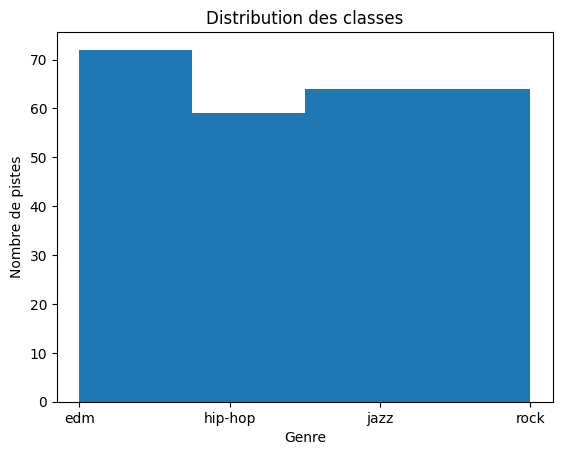

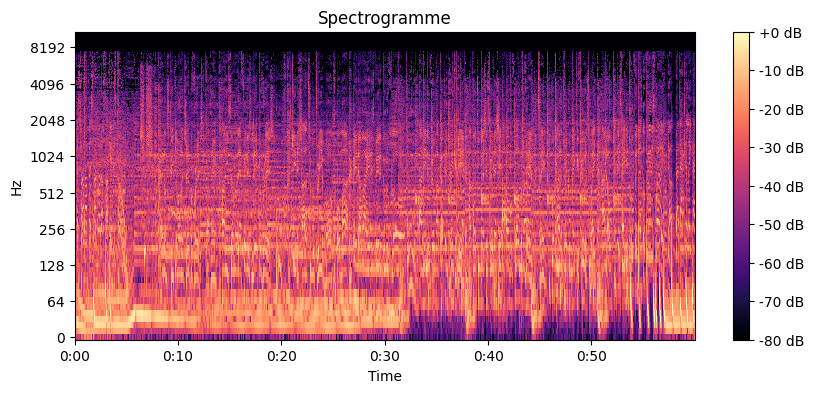

In [17]:
import matplotlib.pyplot as plt

# Visualiser la distribution des classes
plt.hist(y, bins=len(genres))
plt.xlabel('Genre')
plt.ylabel('Nombre de pistes')
plt.xticks(range(len(genres)), genres)
plt.title('Distribution des classes')
plt.show()

# Afficher un exemple de spectrogramme
example_file = '/content/drive/MyDrive/LSMADEVOIR/homework2/audio/edm/0OqS2cIvJtjDWrm7G7EReL.mp3'
audio_data, _ = librosa.load(example_file, sr=None)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(audio_data)), ref=np.max),
                         y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogramme')
plt.show()

# 2. Dimensionality Reduction (PCA):
Apply dimensionality reduction techniques such as Principal Component Analysis (PCA) or t-Distributed Stochastic Neighbor Embedding (t-SNE) to reduce the dimensionality of the feature space while preserving important information.
Visualize the reduced-dimensional feature space to gain insights into the structure of the data.


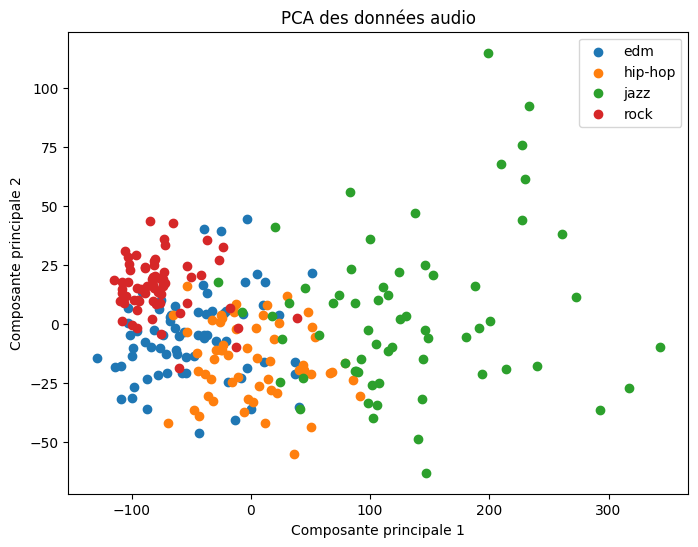

In [24]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Afficher les données après réduction de dimension
plt.figure(figsize=(8, 6))
for i in range(len(genres)):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=genres[i])
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('PCA des données audio')
plt.legend()
plt.show()

# 3. Classification Using Distances
Utilize distance metrics such as Euclidean distance or cosine similarity to compare audio tracks based on their feature vectors.
Implement classification algorithms that leverage these distance metrics to classify tracks into their respective genres.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


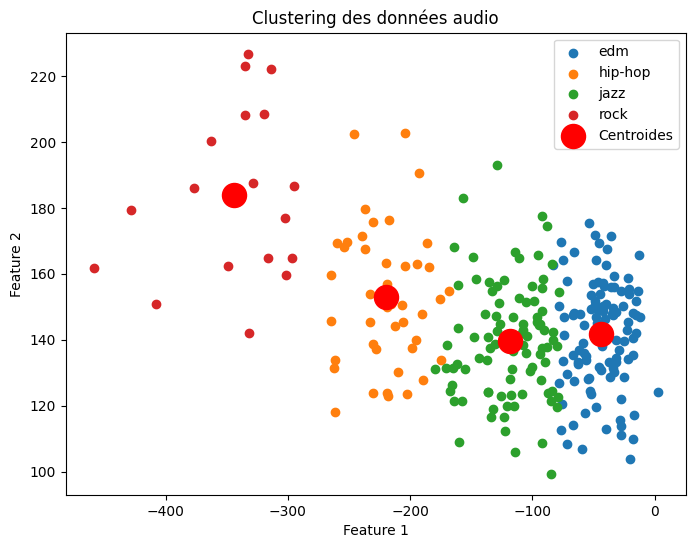

In [25]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(X)

# Afficher les clusters obtenus par K-Means
plt.figure(figsize=(8, 6))
for i in range(len(genres)):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1], label=genres[i])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroides')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering des données audio')
plt.legend()
plt.show()


# 4. Clustering (Unsupervised Learning)
Perform clustering analysis using unsupervised learning techniques such as K-means clustering or hierarchical clustering.
Explore the natural groupings or clusters within the dataset based on the extracted audio features.
Evaluate the quality of the clusters and interpret the results.

Random Forest Classifier Accuracy: 0.8269230769230769


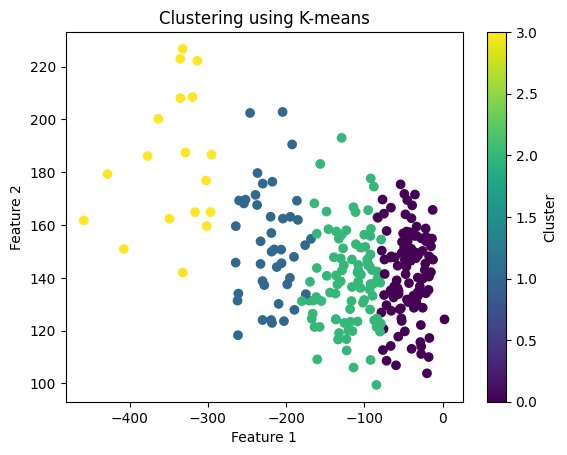

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy:", accuracy)

# Visualisation des clusters
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.title('Clustering using K-means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()



# 5. Machine Learning Classification
Develop machine learning models (e.g., Support Vector Machines, Random Forest, K-Nearest Neighbors) to classify music tracks into their respective genres based on the extracted audio features.
Split the dataset into training and testing sets, train the models, and evaluate their performance using appropriate metrics (e.g., accuracy, precision, recall).

In [15]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(genres), activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
7/7 [==============================] - 3s 204ms/step - loss: 18.3121 - accuracy: 0.1932 - val_loss: 5.7269 - val_accuracy: 0.4038
Epoch 2/10
7/7 [==============================] - 0s 10ms/step - loss: 4.6783 - accuracy: 0.4058 - val_loss: 2.3899 - val_accuracy: 0.5385
Epoch 3/10
7/7 [==============================] - 0s 10ms/step - loss: 2.6783 - accuracy: 0.5749 - val_loss: 1.1472 - val_accuracy: 0.6731
Epoch 4/10
7/7 [==============================] - 0s 12ms/step - loss: 1.5213 - accuracy: 0.6763 - val_loss: 0.7601 - val_accuracy: 0.7692
Epoch 5/10
7/7 [==============================] - 0s 13ms/step - loss: 1.4076 - accuracy: 0.6425 - val_loss: 0.7907 - val_accuracy: 0.6346
Epoch 6/10
7/7 [==============================] - 0s 12ms/step - loss: 1.1789 - accuracy: 0.6715 - val_loss: 0.8851 - val_accuracy: 0.7308
Epoch 7/10
7/7 [==============================] - 0s 13ms/step - loss: 0.9716 - accuracy: 0.6957 - val_loss: 0.9105 - val_accuracy: 0.6923
Epoch 8/10
7/7 [=========

# 6. Deep Learning Classification
Implement deep learning models (e.g., Convolutional Neural Networks, Recurrent Neural Networks) for genre classification tasks.
Preprocess the audio data, design the neural network architecture, and train the models using appropriate training techniques (e.g., mini-batch gradient descent, transfer learning).
Evaluate the performance of the deep learning models and compare them with traditional machine learning approaches.


Epoch 1/10
7/7 [==============================] - 1s 58ms/step - loss: 6.6606 - accuracy: 0.3768 - val_loss: 2.5935 - val_accuracy: 0.5385
Epoch 2/10
7/7 [==============================] - 0s 12ms/step - loss: 2.9310 - accuracy: 0.4734 - val_loss: 1.5685 - val_accuracy: 0.5962
Epoch 3/10
7/7 [==============================] - 0s 11ms/step - loss: 2.3337 - accuracy: 0.5411 - val_loss: 1.9724 - val_accuracy: 0.6154
Epoch 4/10
7/7 [==============================] - 0s 12ms/step - loss: 1.7649 - accuracy: 0.6232 - val_loss: 0.7746 - val_accuracy: 0.7885
Epoch 5/10
7/7 [==============================] - 0s 11ms/step - loss: 1.3395 - accuracy: 0.6570 - val_loss: 0.9802 - val_accuracy: 0.6923
Epoch 6/10
7/7 [==============================] - 0s 12ms/step - loss: 0.9568 - accuracy: 0.6812 - val_loss: 0.7366 - val_accuracy: 0.7500
Epoch 7/10
7/7 [==============================] - 0s 12ms/step - loss: 0.8211 - accuracy: 0.7101 - val_loss: 0.9102 - val_accuracy: 0.7115
Epoch 8/10
7/7 [===========

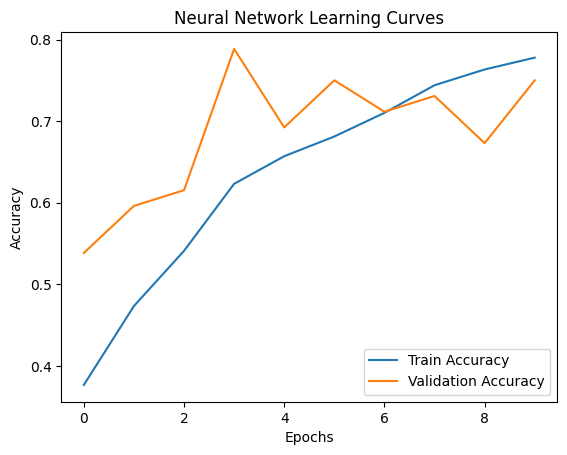

In [28]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(genres), activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Évaluation du modèle
loss, accuracy_nn = model.evaluate(X_test, y_test)
print("Neural Network Classifier Accuracy:", accuracy_nn)

# Visualisation des courbes d'apprentissage
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Neural Network Learning Curves')
plt.legend()
plt.show()

### Conclusion

By following these steps, you can effectively analyze the music dataset, extract relevant features, perform exploratory data analysis, reduce dimensionality, classify tracks into genres, and explore clustering patterns. This comprehensive approach combines both traditional machine learning techniques and deep learning methodologies to gain insights into the music dataset and develop accurate genre classification models.